In [1]:
import pickle
import os
import sys
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset')
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/lib')
from lib.datasets.pascal_ctx import PASCALContext
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from collections import OrderedDict
from scipy.stats import spearmanr
import numpy as np
from matplotlib import pyplot as plt

/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.getcwd()

'/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/analysis/rank_correlation'

In [13]:
subset_paths = [
    '../../data/preprocessing/pascal_ctx_ViT_cossim_0.1_gc_0.1_0.5_stochastic_subsets.pkl',
    '../../data/preprocessing/pascal_ctx_ViT_cossim_0.001_gc_0.1_0.5_stochastic_subsets.pkl',
    '../../data/preprocessing/pascal_ctx_ViT_cossim_1e-05_gc_0.1_0.5_stochastic_subsets.pkl',
]
print(f'Stochastic subset file exists: {os.path.exists(subset_paths[0])}')

Stochastic subset file exists: True


### Stochastic subset loading

In [25]:
def pickle2dict(file_name, key):
    """
    Load dictionary from pickle file
    """
    with open(file_name, "rb") as fIn:
        stored_data = pickle.load(fIn)
        value = stored_data[key]
    return value

In [26]:
experiments = []
for subset_path in subset_paths:
    subsets = pickle2dict(subset_path, 'stochastic_subsets')
    stochastic_subsets = []
    for subset in subsets:
        stochastic_subsets.append([x[0] for x in subset])
    experiments.append(stochastic_subsets)

### Spearman's Rank Correlation

In [27]:
# lens = np.arange(1, len(stochastic_subsets[0]))
# corrs = []
# p_vals = []
# for n in lens:
#     corr = [spearmanr(stochastic_subsets[0][:n], s[:n]) for s in stochastic_subsets][1:]
#     corrs.append(np.mean([x.statistic for x in corr]))
#     p_vals.append(np.mean([x.pvalue for x in corr]))


In [28]:
# plt.plot(lens, corrs)
# plt.plot(lens, p_vals)

## Jaccard Similarity

In [29]:
def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:07<00:00, 39.26it/s] 


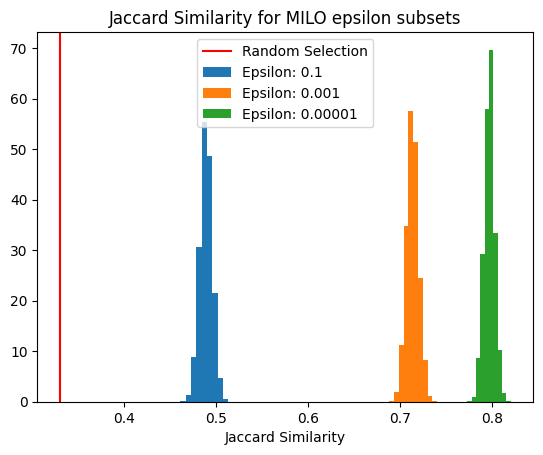

In [31]:
for stochastic_subsets in experiments:
    n = len(stochastic_subsets)
    jaccs = []
    for _,i in tqdm(enumerate(range(n)), total=n):
        for j in range(i+1,n):
            jaccs.append(jaccard_set(stochastic_subsets[i], stochastic_subsets[j]))
    plt.hist(jaccs, density=True)
plt.title('Jaccard Similarity for MILO epsilon subsets')
plt.xlabel('Jaccard Similarity')
plt.axvline(x = 0.33, color = 'r', label = 'Random Selection')
plt.legend(['Random Selection', 'Epsilon: 0.1', 'Epsilon: 0.001', 'Epsilon: 0.00001'])

In [6]:
import random
n = 5000
p = 0.5
test1 = random.sample(range(n), int(n*p))
test2 = random.sample(range(n), int(n*p))
assert len(np.unique(test1)) == len(test1)
assert len(np.unique(test2)) == len(test2)
jaccard_set(test1, test2)

0.32766861391396707